In [22]:
%reset -f

In [23]:
1+1

2

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor as MLP
from sklearn.svm import SVR
import sklearn.neural_network as nn
from sklearn.ensemble import RandomForestRegressor as randomforest
from sklearn.tree import DecisionTreeRegressor as decisiontree
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.kernel_ridge import KernelRidge as kernelridge
from sklearn.linear_model import LinearRegression as LR




In [25]:
Ndim=2
Nx=10000

In [26]:
x=np.random.normal(0,1,(Nx,Ndim))
noise=np.random.normal(0,1,Nx)
x1=x[:,0]
x2=x[:,1]
y=np.heaviside(x1,0.2)-0.5*np.heaviside(x1-1,-0.3)+0.3*np.minimum(x1,0)+0.01*noise*0

xy=np.c_[x,y]
xy_pd=pd.DataFrame(xy)

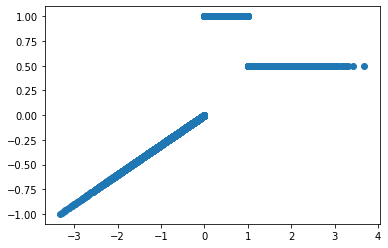

In [27]:
fig=plt.subplot()
ax1=fig.scatter(x1,y)
plt.show()


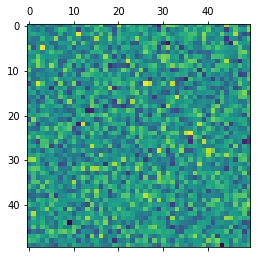

In [28]:
square1=np.random.normal(0,1,(50,50))
plt.matshow(square1)


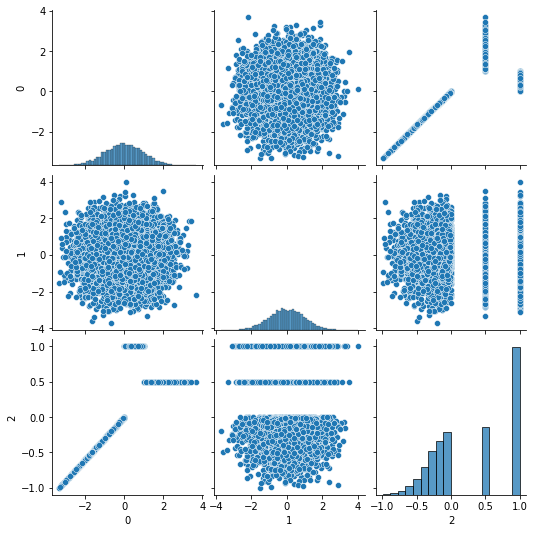

In [29]:
sns.pairplot(xy_pd)

In [30]:
pi=np.pi
temp_daily_vec=np.arange(0,1,1/(12*30))+0.02*np.random.normal(0,1,12*30)
temp_daily_mat=np.zeros((12,30))
for i_month in range(12):
    for i_day in range(30):
        day=i_month*30+i_day
temp_daily_vec=np.sin(temp_daily_vec*pi)
temp_daily_mat = np.reshape(temp_daily_vec, (30,12))


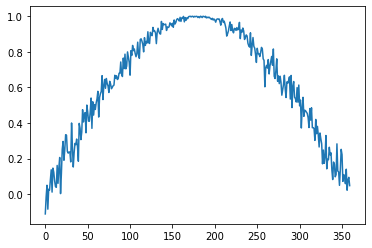

In [31]:
plt.plot(temp_daily_vec)

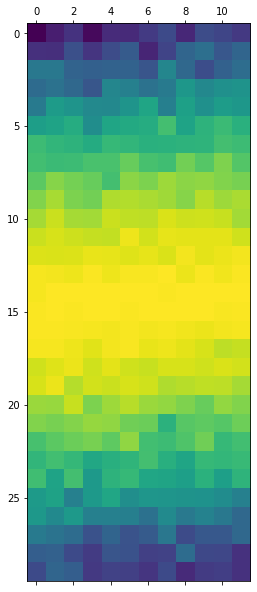

In [32]:
plt.matshow(temp_daily_mat)

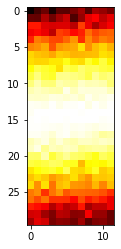

In [33]:
plt.imshow(temp_daily_mat, cmap='hot', interpolation='nearest')


<AxesSubplot:>

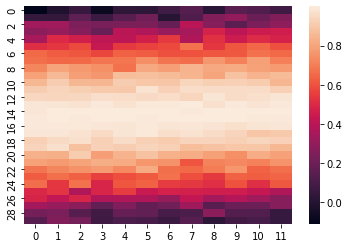

In [34]:
sns.heatmap(temp_daily_mat)

In [114]:

#solver lbfgs adam
#lbfgs doesn't work
#activation tanh relu identity

regr = MLP(random_state=1, max_iter=500,activation='relu'
                    , solver='adam',verbose=10,hidden_layer_sizes=(8,5)
                   , batch_size=200)


regr=MLP(hidden_layer_sizes=(100,)
                  ,activation='relu', solver='adam'
                  , alpha=0.0001, batch_size='auto'
                  , learning_rate='constant', learning_rate_init=0.001
                  , power_t=0.5, max_iter=200
                  , shuffle=True, random_state=None
                  , tol=0.0001, verbose=False, warm_start=False
                  , momentum=0.9, nesterovs_momentum=True
                  , early_stopping=False, validation_fraction=0.1
                  , beta_1=0.9, beta_2=0.999
                  , epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

regr = MLP(random_state=1, max_iter=500,activation='relu'
                    , solver='adam',verbose=10,hidden_layer_sizes=(100,20)
                   , batch_size=200)





In [115]:
x1_mat= x1.reshape(-1, 1)

In [116]:
regr=regr.fit(x1_mat,y)

Iteration 1, loss = 0.05372248
Iteration 2, loss = 0.01905991
Iteration 3, loss = 0.01205123
Iteration 4, loss = 0.00941300
Iteration 5, loss = 0.00787444
Iteration 6, loss = 0.00675549
Iteration 7, loss = 0.00592973
Iteration 8, loss = 0.00524699
Iteration 9, loss = 0.00472226
Iteration 10, loss = 0.00429603
Iteration 11, loss = 0.00393681
Iteration 12, loss = 0.00359370
Iteration 13, loss = 0.00333178
Iteration 14, loss = 0.00311369
Iteration 15, loss = 0.00291568
Iteration 16, loss = 0.00274197
Iteration 17, loss = 0.00259929
Iteration 18, loss = 0.00251369
Iteration 19, loss = 0.00237246
Iteration 20, loss = 0.00227523
Iteration 21, loss = 0.00217682
Iteration 22, loss = 0.00211378
Iteration 23, loss = 0.00201997
Iteration 24, loss = 0.00191537
Iteration 25, loss = 0.00185530
Iteration 26, loss = 0.00182346
Iteration 27, loss = 0.00170864
Iteration 28, loss = 0.00167450
Iteration 29, loss = 0.00165029
Iteration 30, loss = 0.00161334
Iteration 31, loss = 0.00153625
Iteration 32, los

In [117]:
#yhat=regr.predict(x)
yhat=regr.predict(x1_mat)

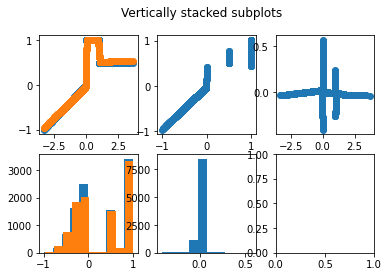

[[1.         0.99627378]
 [0.99627378 1.        ]]


In [118]:
fig, axs = plt.subplots(2,3)
fig.suptitle('Vertically stacked subplots')
axs[0,0].scatter(x1,y)
axs[0,0].scatter(x1,yhat)
axs[0,1].scatter(y,yhat)
axs[1,0].hist(y)
axs[1,0].hist(yhat)
axs[1,1].hist(y-yhat)
axs[0,2].scatter(x1,y-yhat)
plt.show()
print(np.corrcoef(y,yhat))

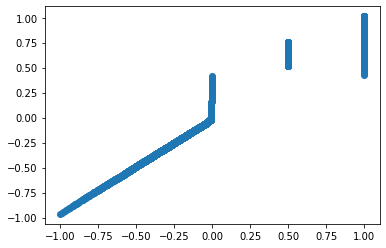

In [119]:
plt.scatter(y,yhat)

In [120]:
params0=MLP.get_params(regr)
coefs0=regr.coefs_
intercepts0=regr.intercepts_
loss0=regr.loss_
nlayers=regr.n_layers_
outactivation0=regr.out_activation_

In [121]:
params0

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 200,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 20),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 10,
 'warm_start': False}

In [41]:
N_neuralnet=0
for i in range(nlayers-1):
    N_neuralnet+=len(np.ndarray.flatten(coefs0[i]))
    N_neuralnet+=len(np.ndarray.flatten(intercepts0[i]))
print(N_neuralnet)

#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’


2241


In [87]:
regr2=SVR( kernel='rbf', degree=3
                , gamma='scale', coef0=0.0
                , tol=0.001, C=1.0
                , epsilon=0.01, shrinking=True
                , cache_size=200, verbose=True, max_iter=- 1)

In [88]:
regr2.fit(x1_mat,y)

[LibSVM]

SVR(epsilon=0.01, verbose=True)

In [89]:
#yhat=regr.predict(x)
yhat=regr2.predict(x1_mat)

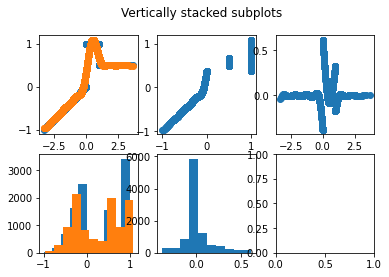

[[1.         0.96461658]
 [0.96461658 1.        ]]


In [90]:
fig, axs = plt.subplots(2,3)
fig.suptitle('Vertically stacked subplots')
axs[0,0].scatter(x1,y)
axs[0,0].scatter(x1,yhat)
axs[0,1].scatter(y,yhat)
axs[1,0].hist(y)
axs[1,0].hist(yhat)
axs[1,1].hist(y-yhat)
axs[0,2].scatter(x1,y-yhat)
plt.show()
print(np.corrcoef(y,yhat))

In [91]:
regr2.class_weight_

array([], dtype=float64)

In [92]:
regr2.intercept_
regr2.n_features_in_
regr2.n_support_
regr2.shape_fit_
regr2.support_
regr2.support_vectors_
regr2.class_weight_
#regr2.coef_
#regr2.dual_coef_

array([], dtype=float64)

In [148]:
regr3=randomforest(n_estimators=100, criterion='squared_error'
             , max_depth=5, min_samples_split=2
             , min_samples_leaf=1, min_weight_fraction_leaf=0.0
             , max_features='auto', max_leaf_nodes=None
             , min_impurity_decrease=0.0, bootstrap=True
             , oob_score=False, n_jobs=None
             , random_state=None, verbose=0
             , warm_start=False, ccp_alpha=0.0, max_samples=None)

In [149]:
regr3.fit(x1_mat,y)

RandomForestRegressor(max_depth=5)

In [150]:
#yhat=regr.predict(x)
yhat=regr3.predict(x1_mat)

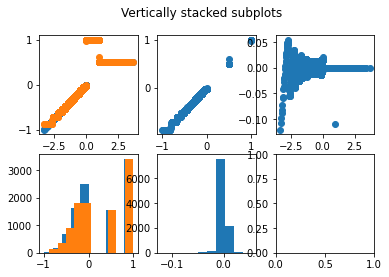

[[1.         0.99990621]
 [0.99990621 1.        ]]


In [151]:
fig, axs = plt.subplots(2,3)
fig.suptitle('Vertically stacked subplots')
axs[0,0].scatter(x1,y)
axs[0,0].scatter(x1,yhat)
axs[0,1].scatter(y,yhat)
axs[1,0].hist(y)
axs[1,0].hist(yhat)
axs[1,1].hist(y-yhat)
axs[0,2].scatter(x1,y-yhat)
plt.show()
print(np.corrcoef(y,yhat))

In [152]:
regr3.base_estimator_
regr3.estimators_[0]
#regr3.feature_importances_
#regr3.n_features_
#regr3.n_features_in_
#regr3.feature_names_in_
#regr3.n_outputs_
#regr3.oob_score_
#regr3.oob_prediction_

DecisionTreeRegressor(max_depth=5, max_features='auto', random_state=357751649)

In [137]:
regr4=decisiontree(criterion='squared_error', splitter='best'
                   , max_depth=5, min_samples_split=2, min_samples_leaf=1
                   , min_weight_fraction_leaf=0.0, max_features=None
                   , random_state=None, max_leaf_nodes=None
                   , min_impurity_decrease=0.0, ccp_alpha=0.0)

In [138]:
regr4.fit(x1_mat,y)

DecisionTreeRegressor(max_depth=5)

In [153]:
#yhat=regr.predict(x)
yhat=regr4.predict(x1_mat)

In [161]:
regr4.feature_importances_
regr4.max_features_
regr4.n_features_
regr4.n_features_in_
#regr4.feature_names_in_
regr4.n_outputs_
regr4.tree_

#explanation about extracting tree rules:
#https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
#very long winded


In [163]:
regr5=GPR(kernel=None, alpha=1e-10
          , optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0
          , normalize_y=False, copy_X_train=True, random_state=None)

In [164]:
regr5.fit(x1_mat,y)

GaussianProcessRegressor()

In [173]:
regr5.X_train_
regr5.y_train_
regr5.kernel_
regr5.L_ #cholesky decomposition
regr5.alpha_ #Dual coefficients of training data points in kernel space.
regr5.log_marginal_likelihood_value_
regr5.n_features_in_
#regr5.feature_names_in_

1

In [174]:
#yhat=regr.predict(x)
yhat=regr5.predict(x1_mat)

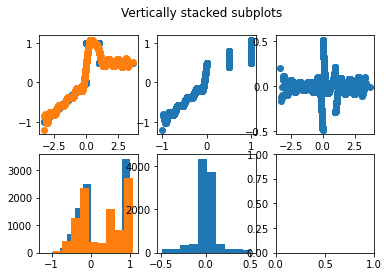

[[1.         0.97358307]
 [0.97358307 1.        ]]


In [175]:
fig, axs = plt.subplots(2,3)
fig.suptitle('Vertically stacked subplots')
axs[0,0].scatter(x1,y)
axs[0,0].scatter(x1,yhat)
axs[0,1].scatter(y,yhat)
axs[1,0].hist(y)
axs[1,0].hist(yhat)
axs[1,1].hist(y-yhat)
axs[0,2].scatter(x1,y-yhat)
plt.show()
print(np.corrcoef(y,yhat))

In [176]:
regr5.log_marginal_likelihood()

-897721687331.8015

In [183]:
regr6=kernelridge(alpha=1, kernel='rbf', gamma=None, degree=3, coef0=1, kernel_params=None)

In [184]:
regr6.fit(x1_mat,y)

KernelRidge(kernel='rbf')

In [189]:
regr6.dual_coef_
regr6.X_fit_
regr6.n_features_in_
#regr6.feature_names_in_

1

In [192]:
regr7=LR(fit_intercept=True, normalize='deprecated', 
   copy_X=True, n_jobs=None, positive=False)

In [193]:
regr7.fit(x1_mat,y)

LinearRegression()

In [194]:
#sklearn.linear_model.ARDRegression
#sklearn.linear_model.BayesianRidge

#sklearn.metrics.mean_absolute_error¶
#sklearn.metrics.mean_absolute_error¶

#sklearn.neighbors.KNeighborsRegressor
#sklearn.neighbors.RadiusNeighborsRegressor¶

#sklearn.svm.NuSVR
